In [1]:
from boxoffice.db.frames import get_box_office_day_frame

bodf = get_box_office_day_frame()

if bodf is None:
    print('No box office data found')
    exit()

# select only the columns we need
filtered = bodf[['movie', 'revenue']]

# group by movie id and sum the box office revenue
filtered = filtered.groupby('movie').sum()

# sort by box office
filtered = filtered.sort_values(by='revenue', ascending=False)

print(filtered)

top_10_ids = filtered.head(10).index

print(top_10_ids)

         revenue
movie           
1116   992642689
2137   918373000
241    864804872
482    785222649
383    738032821
...          ...
3343          26
2822          26
5897          20
2825          11
4768           4

[6076 rows x 1 columns]
Index([1116, 2137, 241, 482, 383, 1739, 1801, 548, 951, 5], dtype='int64', name='movie')


                    id_x   revenue  theaters              title  id_y
movie date                                                           
5     2024-06-13    6976  13000000       0.0       Inside Out 2     5
      2024-06-14    7001  63558115    4440.0       Inside Out 2     5
      2024-06-15    7027  51175086    4440.0       Inside Out 2     5
      2024-06-16    7054  39468472    4440.0       Inside Out 2     5
      2024-06-17    7081  22421841    4440.0       Inside Out 2     5
...                  ...       ...       ...                ...   ...
2137  2019-09-08  110022      4154      55.0  Avengers: Endgame  2137
      2019-09-09  110075       940      55.0  Avengers: Endgame  2137
      2019-09-10  110121      2098      55.0  Avengers: Endgame  2137
      2019-09-11  110169      1934      55.0  Avengers: Endgame  2137
      2019-09-12  110219      1663      55.0  Avengers: Endgame  2137

[1770 rows x 5 columns]


/tmp/ipykernel_20316/877393315.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['day_number'] = range(1, len(movie_data) + 1)
/tmp/ipykernel_20316/877393315.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['cumulative'] = movie_data['revenue'].cumsum()
/tmp/ipykernel_20316/877393315.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

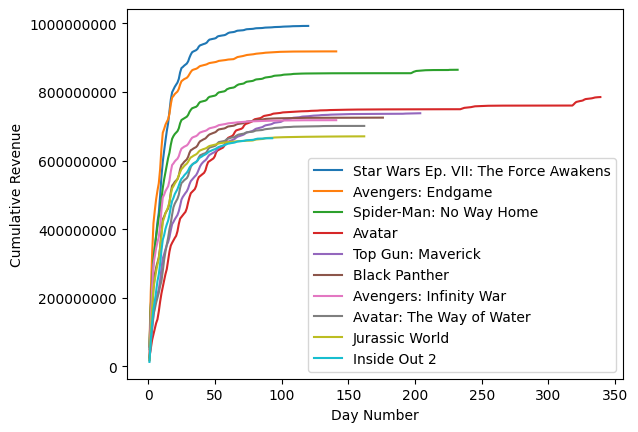

In [2]:
# now we have the top 10 movie ids, we want to create a graph of the cumulative revenue over time for those 10 movies
relevant_data = bodf[bodf['movie'].isin(top_10_ids)]

from boxoffice.db.frames import get_movie_frame_nv

mf = get_movie_frame_nv()

# add the movie title to the data
relevant_data = relevant_data.merge(mf[['title', 'id']], left_on='movie', right_on='id')

# group by movie and date
relevant_data = relevant_data.groupby(['movie', 'date']).sum()

print(relevant_data)

# now we want to create a graph of the cumulative revenue over time for each movie
import matplotlib.pyplot as plt

for movie_id in top_10_ids:
    movie_data = relevant_data.loc[movie_id]
    movie_data['day_number'] = range(1, len(movie_data) + 1)
    movie_data['cumulative'] = movie_data['revenue'].cumsum()
    plt.plot(movie_data['day_number'], movie_data['cumulative'], label=movie_data['title'].iloc[0])

plt.xlabel('Day Number')
plt.ylabel('Cumulative Revenue')

plt.ticklabel_format(style='plain', axis='y')

plt.legend()

plt.show()